In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# (b)

In [4]:
# input data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([-0.1, -1.0, 3.1, 1.5, 4.7, 5.2, 5.6, 6.3, 7.4, 9.5])
error = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])*10

# define linear function
def fit(x, a, b=0):
    return a*x + b

# guess parameters
a0 = 1

# do curve fit
popt, pcov = curve_fit(fit, x, y, p0=[a0], sigma=error)
fit_error = np.sqrt(np.diag(pcov))
print('a =', popt[0], '±', fit_error[0])

a = 0.9715789473684211 ± 0.05933283890436871


# (c)

In [5]:
# calculate chi squared and other stats
residuals = fit(x, *popt) - y
norm_residuals = residuals / error
chi_sq = np.sum(norm_residuals**2)
print('chi squared =',chi_sq)
nu=len(x)-len(popt)
nu_error = np.sqrt(2*nu)
print('degrees of freedom =', nu, '±', nu_error)


(c)
chi squared = 9.029789473684213
degrees of freedom = 9 ± 4.242640687119285


# (d)

Probability = 0.4112800783337215
Compared to significance of 0.05


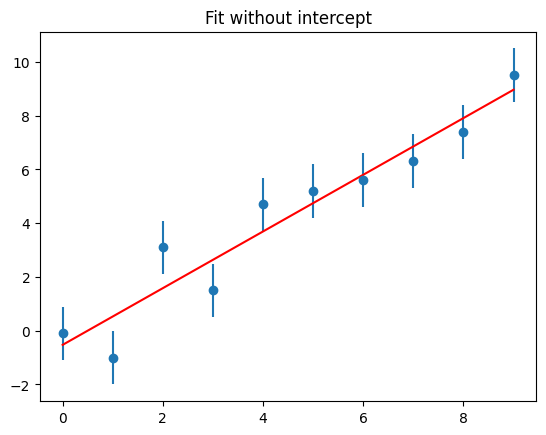

In [9]:
# compare to 5% significance
from scipy.stats import chi2
prob = 1 - chi2.cdf(chi_sq, nu)
print('Probability =', prob)
print('Compared to significance of 0.05')

# plot
plt.errorbar(x, y, yerr=error, fmt='o')
plt.plot(x, fit(x, *popt), 'r-')
plt.title('Fit without intercept')
plt.show()

# (e)
The the formulas derived in (a) to calculate $a$ and $\sigma_a$.

In [11]:
# Define function for a [DONE]
def analytical_a(x_data, y_data, error):
    # Find the numerator and denominator of the expression from (a)
    numerator = np.sum( x_data*y_data / error )
    denominator = np.sum( x_data*x_data / error )
    return numerator/denominator

# Define function for sigma_a [TODO]
# step 1: Define a function "calculate_sigma_a" with parameters "x_data, y_data, error"
# step 2: Inside the function, write the math found from (a). See Hamish's or Wei's notes
# step 3: Run the function, entering "x, y, error" as the parameters
# step 4: Print below

# Print results
a_opt = analytical_a(x, y, error)
a_error = ...
print("Calculated a =", a_opt, "+/-", a_error)


Calculated a = 0.971578947368421 +/- Ellipsis


# (f)
Do fit again but this time add an intercept

a = 1.0545454545454547 ± 0.11167149667537649
b = -0.5254545454545456 ± 0.5961626704509965
chi squared = 8.230545454545455
degrees of freedom = 8 ± 4.0
probability = 0.4112800783337215


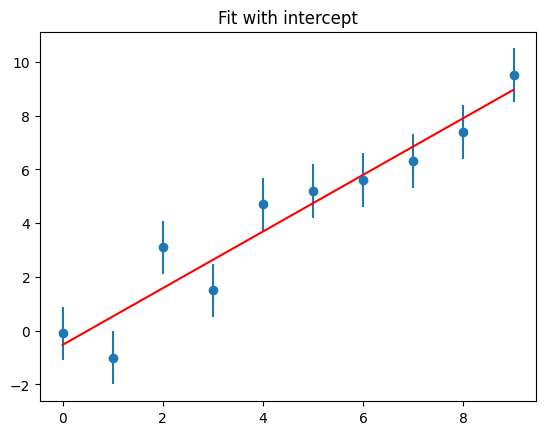

In [8]:
# define linear function
def fit(x, a, b=0):
    return a*x + b

# guess parameters
a0 = 1
b0 = -1  # ! We added this!

# do curve fit
popt, pcov = curve_fit(fit, x, y, p0=[a0, b0], sigma=error)
fit_error = np.sqrt(np.diag(pcov))
print('a =', popt[0], '±', fit_error[0])
print('b =', popt[1], '±', fit_error[1])

# calculate chi squared and other stats
residuals = fit(x, *popt) - y
norm_residuals = residuals / error
chi_sq = np.sum(norm_residuals**2)
print('chi squared =',chi_sq)
nu=len(x)-len(popt)
nu_error = np.sqrt(2*nu)
print('degrees of freedom =', nu, '±', nu_error)

# compare to 5% significance
from scipy.stats import chi2
prob = 1 - chi2.cdf(chi_sq, nu)
print('probability =', prob)

# plot
plt.errorbar(x, y, yerr=error, fmt='o')
plt.plot(x, fit(x, *popt), 'r-')
plt.title('Fit with intercept')
plt.show()